# Working with personal data requests


In [1]:
import pandas as pd
import numpy as np
import datetime as dt

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



In [2]:
df = pd.read_json("post_comments.json")

#Here I am figuring out how to get my timestamp
time = df.iloc[0][0]["string_map_data"]["Time"]["timestamp"]
print(dt.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))

2017-11-05 15:51:43


In [3]:
# This code gets us the comments and the timestamps
timestamps = []
comments = []
for i in range (0, len(df)):
    time = df.iloc[i][0]["string_map_data"]["Time"]["timestamp"]
    comment = df.iloc[i][0]["string_map_data"]["Comment"]["value"]
    timestamps.append(dt.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))
    comments.append(comment)

#Here is a new data frame that just has the timestamps and the comments
updated_df = pd.read_json("post_comments.json")
updated_df["Comments"] = comments
updated_df["Timestamp"] = timestamps
updated_df = updated_df.drop("comments_media_comments", axis = 1)
updated_df

,Comments,Timestamp
0,@just_kushal Ty Kushal,2017-11-05 15:51:43
1,Lol,2017-10-06 20:26:57
2,He signed ur phone tho,2019-03-08 22:33:16
3,@swish_i,2019-03-08 18:01:33
4,@swish_i,2019-03-08 18:01:33
...,...,...
1197,Sam darnold fans for the week ðð»,2021-12-29 11:48:43
1198,#fakenews,2021-12-28 00:01:26
1199,@no_username_0123_ well obviously they both ar...,2021-12-26 20:12:27
1200,@no_username_0123_ not counting klay or wisema...,2021-12-26 19:47:51


In [4]:
# This is just the timestamp dataframe
timestamps_df = pd.read_json("post_comments.json")
timestamps_df["Timestamp"] = timestamps
timestamps_df = timestamps_df.drop("comments_media_comments", axis = 1)

# At the end, make sure you export your dataframe (containing timestamps) using .to_csv
timestamps_df.to_csv("timestamps_luca.csv")

In [5]:
#This is Ava's dataframe
ava_df = pd.read_csv("ava-times.csv")
ava_df

,Unnamed: 0,startTime
0,0,2021-02-12T01:56:00.000
1,1,2021-02-11T00:58:00.000
2,2,2021-02-10T01:28:00.000
3,3,2021-02-09T02:01:00.000
4,4,2021-02-08T01:31:30.000
...,...,...
357,26,2021-12-14T01:31:00.000
358,27,2021-12-13T00:14:00.000
359,28,2021-12-12T00:45:30.000
360,29,2021-12-11T01:39:30.000


In [6]:
# Creating a new Datetime object
ava_df["Datetime"] = pd.to_datetime(ava_df["startTime"])
ava_df

,Unnamed: 0,startTime,Datetime
0,0,2021-02-12T01:56:00.000,2021-02-12 01:56:00
1,1,2021-02-11T00:58:00.000,2021-02-11 00:58:00
2,2,2021-02-10T01:28:00.000,2021-02-10 01:28:00
3,3,2021-02-09T02:01:00.000,2021-02-09 02:01:00
4,4,2021-02-08T01:31:30.000,2021-02-08 01:31:30
...,...,...,...
357,26,2021-12-14T01:31:00.000,2021-12-14 01:31:00
358,27,2021-12-13T00:14:00.000,2021-12-13 00:14:00
359,28,2021-12-12T00:45:30.000,2021-12-12 00:45:30
360,29,2021-12-11T01:39:30.000,2021-12-11 01:39:30


In [7]:
# Difference in time
ava_df = ava_df.sort_values(by = ["Datetime"])
ava_df["Difference"] = ava_df["Datetime"].diff()

In [8]:
#Answer 1
ava_df["Difference"].describe()
#The max difference is 3 days, 44 minutes
#The average difference is 23 hours, 56 minutes, 6 seconds

count                          361
mean     0 days 23:56:06.980609418
std      0 days 09:01:31.360330643
min                0 days 00:00:00
25%                0 days 23:08:00
50%                0 days 23:56:00
75%                1 days 00:34:30
max                3 days 00:44:00
Name: Difference, dtype: object

In [9]:
#Adding columns for days, months, date, and years
ava_df["Year"] = ava_df["Datetime"].dt.year
ava_df["Month"] = ava_df["Datetime"].dt.month
ava_df["Day"] = ava_df["Datetime"].dt.day
ava_df["Date"] = ava_df["Datetime"].dt.date

#This gets us the day with the most timestamps
current_day = ava_df.iloc[0]["Date"]
max_count = 0
current_count = 0
max_day = ava_df.iloc[0]["Date"]
for day in range  (len(ava_df["Date"])):
    if (current_day == ava_df.iloc[day]["Date"]):
        current_count = current_count + 1
    else:
        current_day = ava_df.iloc[day]["Date"]
        current_count = 1
    if(current_count > max_count):
        max_day = ava_df.iloc[day]["Date"]
        max_count = current_count
print("The day with the most timestamps is " + str(max_day) + " with a count of " + str(max_count))

The day with the most timestamps is 2021-03-26 with a count of 3


In [10]:
#Finding the max month
month_count = 0
max_count = 0
max_month = ava_df.iloc[0]["Month"]
current_month = ava_df.iloc[0]["Month"]
for month in range(len(ava_df["Month"])):
    if (current_month == ava_df.iloc[month]["Month"]):
        month_count = month_count + 1
    else:
        current_month = ava_df.iloc[month]["Month"]
        month_count = 1
    if(month_count > max_count):
        max_month = ava_df.iloc[month]["Month"]
        max_count = month_count
print("The month with the most timestamps is " + str(max_month) + " which is March, with a count of " + str(max_count))

The month with the most timestamps is 3 which is March, with a count of 34


# Analysis
Given the fact that for the most part I'm getting data once per day, at a similar time, that is driving my analysis. I think this data from some sort of fitness watch that needs to charge on a daily basis, similar to my apple watch. I think specifically its saving the moment that the watch is put to charge. It makes sense that the watch would need to be charged on a daily basis, and you could put the watch to charge right before you sleep, which is why it is a similar timestamp every single day. It also explains why there occasionally is more than one timestamp per day, as you could have put the watch the charge more than once a day, but that wouldn't be typical.

# Part 4

I was curious about getting the timestamps from my followers list and doing some work with those. There's probably more data in the followers list than there was in the comments list

The two questions I want to answer are:

What day did I accept the most followers? How many followers was it?

What was the earliest day I accepted a follower? What was the latest? What is the difference in time to the day between the two? (The last question is the hardest here)

Post-note: I know doing timestamps again wasn't technically different than Part 2, but there was a different process in getting the timestamps from the json file, and it was a new process to get the most accepted day and the earliest and latest day. The timestamps aspect was probably the most interesting part of my personal data in my opnion so I just wanted to keep working with that.

In [89]:
followers_df = pd.read_json("followers_1.json")

#Getting these timestamps was a completely different process to the first time.
#Here is how to get the timestamps now
time = followers_df.iloc[0][2][0]["timestamp"]
print(dt.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))

2023-03-28 13:20:32


In [55]:
#This is getting a lis of all the timestamps where I added a follower
timestamps = []
for i in range (0, len(followers_df)):
    time = followers_df.iloc[i][2][0]["timestamp"]
    timestamps.append(dt.datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S'))

#This is formatting a new dataframe to have just the timestamps
final_followers_df = pd.read_json("followers_1.json")
final_followers_df["Timestamp"] = timestamps
final_followers_df = final_followers_df.drop("title", axis = 1)
final_followers_df = final_followers_df.drop("media_list_data", axis = 1)
final_followers_df = final_followers_df.drop("string_list_data", axis = 1)
final_followers_df

,Timestamp
0,2023-03-28 13:20:32
1,2023-03-28 13:20:27
2,2023-03-22 23:09:42
3,2023-03-22 23:09:40
4,2023-03-17 22:04:22
...,...
631,2017-08-09 21:16:48
632,2017-08-09 20:53:54
633,2017-08-09 20:42:36
634,2017-08-09 20:32:37


In [59]:
#This is just adding a Datetime object, year, month, day, and date to my dataframe
final_followers_df["Datetime"] = pd.to_datetime(final_followers_df["Timestamp"])
final_followers_df["Year"] = final_followers_df["Datetime"].dt.year
final_followers_df["Month"] = final_followers_df["Datetime"].dt.month
final_followers_df["Day"] = final_followers_df["Datetime"].dt.day
final_followers_df["Date"] = final_followers_df["Datetime"].dt.date
final_followers_df

,Timestamp,Datetime,Year,Month,Day,Date
0,2023-03-28 13:20:32,2023-03-28 13:20:32,2023,3,28,2023-03-28
1,2023-03-28 13:20:27,2023-03-28 13:20:27,2023,3,28,2023-03-28
2,2023-03-22 23:09:42,2023-03-22 23:09:42,2023,3,22,2023-03-22
3,2023-03-22 23:09:40,2023-03-22 23:09:40,2023,3,22,2023-03-22
4,2023-03-17 22:04:22,2023-03-17 22:04:22,2023,3,17,2023-03-17
...,...,...,...,...,...,...
631,2017-08-09 21:16:48,2017-08-09 21:16:48,2017,8,9,2017-08-09
632,2017-08-09 20:53:54,2017-08-09 20:53:54,2017,8,9,2017-08-09
633,2017-08-09 20:42:36,2017-08-09 20:42:36,2017,8,9,2017-08-09
634,2017-08-09 20:32:37,2017-08-09 20:32:37,2017,8,9,2017-08-09


In [90]:
#Here is the answer to Question 1
#This is how I found the day with the most followers and the count
current_day = final_followers_df.iloc[0]["Date"]
max_count = 0
current_count = 0
max_day = final_followers_df.iloc[0]["Date"]
for day in range (len(final_followers_df["Date"])):
    if (current_day == final_followers_df.iloc[day]["Date"]):
        current_count = current_count + 1
    else:
        current_day = final_followers_df.iloc[day]["Date"]
        current_count = 1
    if(current_count > max_count):
        max_day = final_followers_df.iloc[day]["Date"]
        max_count = current_count
print("The day with the most timestamps is " + str(max_day) + " with a count of " + str(max_count))

The day with the most timestamps is 2017-08-11 with a count of 13


In [177]:
#These are the answers to Question 2
#This was a little easier than I initially expected, so I wanted to calculate how many years that was
first_follower = final_followers_df.iloc[len(final_followers_df)-1]["Datetime"]
last_follower = final_followers_df.iloc[0]["Datetime"]
difference = last_follower - first_follower
print ("The total difference in time between my first and last accepted follower was " + str(difference))
years = int(difference.days/365)
#The -1 is to account for the leap year that was 2020
days = int(difference.days%365-1)
#Getting the hours, minutes, and seconds was the hardest part of all this
print("That would end up being "+ str(years) + " years, " + str(days) + " days, "+ str(difference.seconds//3600) +" hours, " 
          + str((difference.seconds//60)%60) + " minutes, and " + str(difference.seconds % 60) + " seconds")
    

The total difference in time between my first and last accepted follower was 2056 days 17:21:12
That would end up being 5 years, 230 days, 17 hours, 21 minutes, and 12 seconds


<BarContainer object of 409 artists>

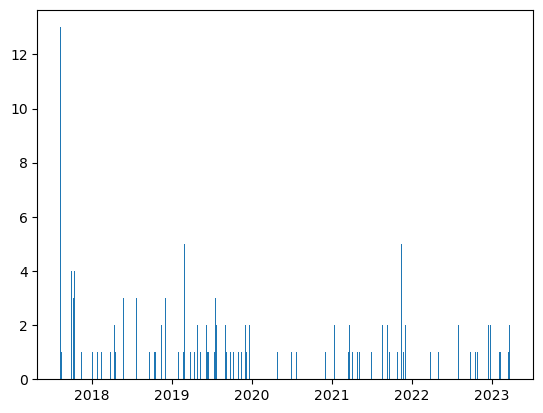

In [235]:
import matplotlib.pyplot as plt
#This is my visualization, showing when I got each of my 636 followers
new_follower_df = pd.DataFrame()
new_follower_df["Count"] = final_followers_df["Date"].value_counts()
plt.bar(new_follower_df.index, new_follower_df["Count"])